In [1]:
import sys

sys.path.append('../../code/')
import os
import json
from datetime import datetime
import time
from math import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import igraph as ig

from load_data import load_citation_network_igraph, case_info
from helper_functions import rankdata_reverse

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_dir = '../../data/'
court_name = 'scotus'

# load into igraph

In [2]:
g_d = load_citation_network_igraph(data_dir, 'scotus', directed=True)
g_u = load_citation_network_igraph(data_dir, 'scotus', directed=False)

0 seconds for 250465 edges
0 seconds for 250465 edges


In [3]:
case_metrics = pd.DataFrame(index=range(len(g_d.vs)))
case_metrics['id'] = g_d.vs['name']
case_metrics['year'] = g_d.vs['year']


# run on directed graph
case_metrics['authority_d'] = g_d.authority_score()
case_metrics['indegree_d'] = g_d.indegree()
case_metrics['outdegree_d'] = g_d.outdegree()
case_metrics['hubs_d'] = g_d.hub_score()
case_metrics['betweenness_d'] = g_d.betweenness()
case_metrics['eigen_d'] = g_d.eigenvector_centrality()
case_metrics['closeness_d'] = g_d.closeness()
case_metrics['pagerank_d'] = g_d.pagerank()

# run on undirected graph
case_metrics['authority_u'] = g_u.authority_score()
case_metrics['indegree_u'] = g_u.indegree()
case_metrics['outdegree_u'] = g_u.outdegree()
case_metrics['hubs_u'] = g_u.hub_score()
case_metrics['betweenness_u'] = g_u.betweenness()
case_metrics['eigen_u'] = g_u.eigenvector_centrality()
case_metrics['closeness_u'] = g_u.closeness()
case_metrics['pagerank_u'] = g_u.pagerank()

In [ ]:
case_metrics[case_metrics]

In [7]:
# case_metrics.to_csv(data_dir + 'analysis/case_metrics.csv', index=False)
# pd.read_csv(data_dir + 'analysis/case_metrics.csv')

In [26]:
case_ranks = pd.DataFrame(index=case_metrics.index,
                         columns=case_metrics.columns)
case_ranks['id'] = case_metrics['id']
case_ranks['year'] = case_metrics['year']


for col in case_metrics.columns[2:]:
    case_ranks[col] = rankdata_reverse(case_metrics[col].tolist())

In [33]:
case_metrics.sort_values('pagerank_d', ascending=False)

,id,year,authority_d,indegree_d,outdegree_d,hubs_d,betweenness_d,eigen_d,closeness_d,pagerank_d,authority_u,indegree_u,outdegree_u,hubs_u,betweenness_u,eigen_u,closeness_u,pagerank_u
18886,85131,1816,1.157353e-01,181,0,2.034008e-14,0.000000e+00,1.000000e+00,0.000176,0.001634,1.610516e-01,181,181,1.610516e-01,1.239950e+06,1.610516e-01,0.000176,0.000237
24956,91573,1886,5.042884e-01,234,0,2.637747e-14,0.000000e+00,1.070919e-02,0.000176,0.001280,4.603153e-01,234,234,4.603153e-01,1.817754e+06,4.603153e-01,0.000176,0.000279
19247,85534,1827,6.768311e-02,124,0,1.398579e-14,0.000000e+00,9.276676e-01,0.000176,0.001265,8.835111e-02,124,124,8.835111e-02,4.601963e+05,8.835111e-02,0.000176,0.000162
18914,85160,1816,1.025219e-01,94,0,1.061630e-14,0.000000e+00,4.708626e-01,0.000176,0.001016,9.440510e-02,94,94,9.440510e-02,1.163621e+06,9.440510e-02,0.000176,0.000161
22148,88661,1873,2.433521e-01,124,0,1.398579e-14,0.000000e+00,1.402792e-01,0.000176,0.000984,2.555743e-01,124,124,2.555743e-01,6.557200e+05,2.555743e-01,0.000176,0.000153
23084,89675,1878,1.169660e-01,107,3,1.264144e-02,1.678772e+04,9.907676e-02,0.000176,0.000890,1.410844e-01,110,110,1.410844e-01,6.610216e+05,1.410844e-01,0.000176,0.000156
22280,88804,1874,7.094948e-02,93,0,1.049883e-14,0.000000e+00,1.599104e-01,0.000176,0.000866,7.668985e-02,93,93,7.668985e-02,4.228084e+05,7.668985e-02,0.000176,0.000138
19060,85330,1821,1.668248e-01,157,0,1.769310e-14,0.000000e+00,2.965331e-01,0.000176,0.000860,1.592372e-01,157,157,1.592372e-01,2.573332e+06,1.592372e-01,0.000176,0.000225
31365,98094,1914,2.838527e-01,138,11,4.539784e-02,2.698975e+05,0.000000e+00,0.000176,0.000785,3.104819e-01,149,149,3.104819e-01,2.504442e+05,3.104819e-01,0.000176,0.000170
16953,1528394,1867,6.914532e-02,55,1,1.495658e-06,1.531319e+04,3.937228e-02,0.000176,0.000782,7.742759e-02,56,56,7.742759e-02,2.696736e+05,7.742759e-02,0.000176,0.000084


In [39]:
case_info(88661)

Slaughter-House Cases
1873-04-14

https://www.courtlistener.com/opinion/88661/slaughter-house-cases/



In [27]:
erie = case_metrics[case_metrics.id == 103012]
case_ranks[case_ranks.id == 103012]

,id,year,authority_d,indegree_d,outdegree_d,hubs_d,betweenness_d,eigen_d,closeness_d,pagerank_d,authority_u,indegree_u,outdegree_u,hubs_u,betweenness_u,eigen_u,closeness_u,pagerank_u
2891,103012,1938,197,8,487,4387,4,23887,2,94,561,12,12,561,2,561,2,9


In [28]:
detroit = case_metrics[case_metrics.id == 96405]
case_ranks[case_ranks.id == 96405]

,id,year,authority_d,indegree_d,outdegree_d,hubs_d,betweenness_d,eigen_d,closeness_d,pagerank_d,authority_u,indegree_u,outdegree_u,hubs_u,betweenness_u,eigen_u,closeness_u,pagerank_u
29701,96405,1906,18,1,1542,13214,489,6669,5,65,211,1,1,211,1,211,5,2


In [40]:
slaughter = case_metrics[case_metrics.id == 88661]
case_ranks[case_ranks.id == 88661]

,id,year,authority_d,indegree_d,outdegree_d,hubs_d,betweenness_d,eigen_d,closeness_d,pagerank_d,authority_u,indegree_u,outdegree_u,hubs_u,betweenness_u,eigen_u,closeness_u,pagerank_u
22148,88661,1873,117,51,24208,23174,18951,45,53,5,277,186,186,277,173,277,53,253


# closeness

(0, 0.0003)

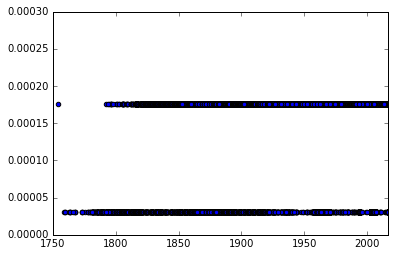

In [5]:
plt.scatter(case_metrics['year'], case_metrics['closeness_d'])
plt.xlim([1750, 2016])
plt.ylim([0, .0003])

# Authority

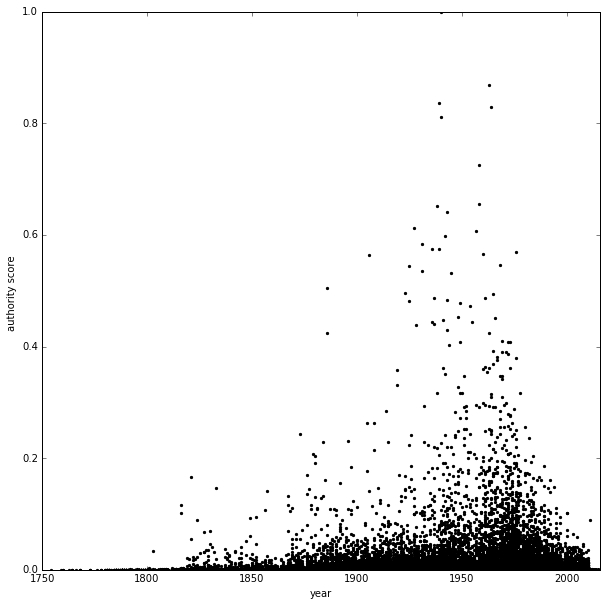

In [22]:
plt.figure(figsize=[10, 10])
plt.scatter(case_metrics['year'],
            case_metrics['authority_d'],
            marker='.',
            color='black')

# plt.scatter(detroit['year'],
#             detroit['authority_d'],
#             marker='.',
#             color='red',
#             s=1000)


plt.xlim([1750, 2016])
plt.ylim([0, 1])

plt.xlabel('year')
plt.ylabel('authority score ')

# Page rank

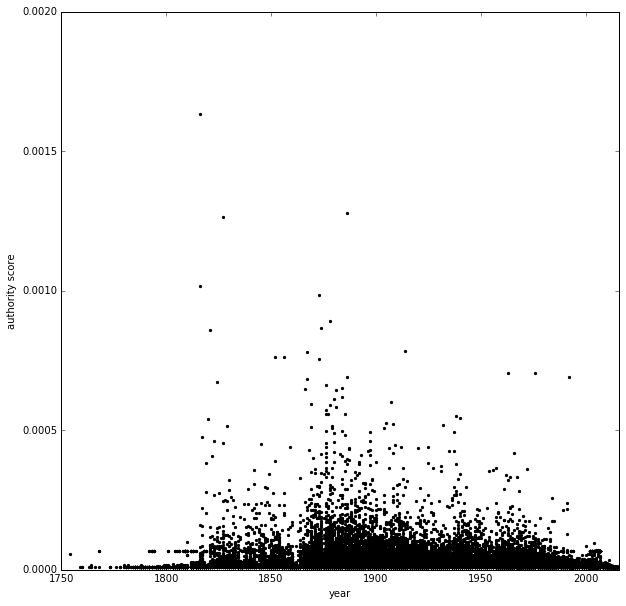

In [18]:
plt.figure(figsize=[10, 10])
plt.scatter(case_metrics['year'],
            case_metrics['pagerank_d'],
            marker='.',
            color='black')
plt.xlim([1750, 2016])
plt.ylim([0, .002])

plt.xlabel('year')
plt.ylabel('pagerank ')

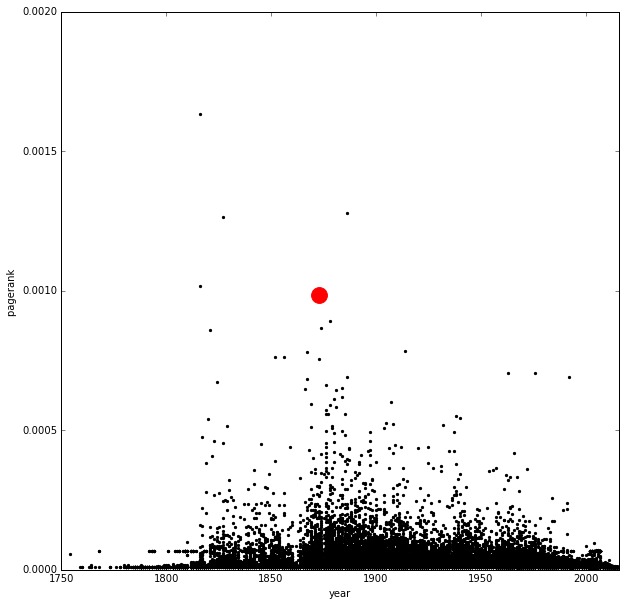

In [41]:
plt.figure(figsize=[10, 10])
plt.scatter(case_metrics['year'],
            case_metrics['pagerank_d'],
            marker='.',
            color='black')

plt.scatter(slaughter['year'],
            slaughter['pagerank_d'],
            marker='.',
            color='red',
            s=1000)

plt.xlim([1750, 2016])
plt.ylim([0, .002])

plt.xlabel('year')
plt.ylabel('pagerank ')

# rank correlations

In [50]:
kendall_tau = pd.DataFrame(index=case_ranks.columns[1:], columns=case_ranks.columns[1:])
for ra in case_ranks.columns[1:]:
    for rb in case_ranks.columns[1:]:
        kendall_tau.loc[ra, rb] = stats.kendalltau(case_ranks[ra], case_ranks[rb]).correlation

kendall_tau   

,authority_d,indegree_d,outdegree_d,hubs_d,betweenness_d,eigen_d,closeness_d,pagerank_d,authority_u,indegree_u,outdegree_u,hubs_u,betweenness_u,eigen_u,closeness_u,pagerank_u
authority_d,1,0.741248,0.495374,0.556081,0.573691,0.383767,0.732838,0.513871,0.75579,0.699461,0.699461,0.75579,0.554221,0.749174,0.732838,0.542936
indegree_d,0.741248,1,0.431341,0.443222,0.640582,0.538265,0.638519,0.7367,0.573564,0.73274,0.73274,0.573564,0.630091,0.566826,0.638519,0.657485
outdegree_d,0.495374,0.431341,1,0.73232,0.657041,0.114876,0.661082,0.246336,0.621001,0.740664,0.740664,0.621001,0.597519,0.614242,0.661082,0.633759
hubs_d,0.556081,0.443222,0.73232,1,0.523644,0.1008,0.704172,0.242103,0.770513,0.663756,0.663756,0.770513,0.499844,0.776026,0.704172,0.489353
betweenness_d,0.573691,0.640582,0.657041,0.523644,1,0.357284,0.587297,0.498246,0.509853,0.67153,0.67153,0.509853,0.687608,0.509676,0.587297,0.630068
eigen_d,0.383767,0.538265,0.114876,0.1008,0.357284,1,0.29683,0.610198,0.227622,0.342654,0.342654,0.227622,0.378185,0.222044,0.29683,0.319571
closeness_d,0.732838,0.638519,0.661082,0.704172,0.587297,0.29683,1,0.423819,0.84909,0.796893,0.796893,0.84909,0.642861,0.836481,1,0.611534
pagerank_d,0.513871,0.7367,0.246336,0.242103,0.498246,0.610198,0.423819,1,0.363299,0.507507,0.507507,0.363299,0.506861,0.35677,0.423819,0.539262
authority_u,0.75579,0.573564,0.621001,0.770513,0.509853,0.227622,0.84909,0.363299,1,0.719045,0.719045,1,0.535905,0.987339,0.84909,0.521697
indegree_u,0.699461,0.73274,0.740664,0.663756,0.67153,0.342654,0.796893,0.507507,0.719045,1,1,0.719045,0.736327,0.706333,0.796893,0.804298


In [53]:
spearman = pd.DataFrame(index=case_ranks.columns[1:], columns=case_ranks.columns[1:])
for ra in case_ranks.columns[1:]:
    for rb in case_ranks.columns[1:]:
        spearman.loc[ra, rb] = stats.spearmanr(case_ranks[ra], case_ranks[rb]).correlation

spearman  

,authority_d,indegree_d,outdegree_d,hubs_d,betweenness_d,eigen_d,closeness_d,pagerank_d,authority_u,indegree_u,outdegree_u,hubs_u,betweenness_u,eigen_u,closeness_u,pagerank_u
authority_d,1,0.893353,0.646366,0.716477,0.742643,0.564037,0.884967,0.693259,0.880444,0.85769,0.85769,0.880444,0.731801,0.878601,0.884967,0.718019
indegree_d,0.893353,1,0.558302,0.571893,0.778166,0.706149,0.787145,0.878629,0.720841,0.860148,0.860148,0.720841,0.786256,0.717157,0.787145,0.806103
outdegree_d,0.646366,0.558302,1,0.89046,0.798001,0.174348,0.812595,0.33942,0.782417,0.865879,0.865879,0.782417,0.748821,0.778694,0.812595,0.784742
hubs_d,0.716477,0.571893,0.89046,1,0.683605,0.179545,0.874319,0.347262,0.910197,0.830649,0.830649,0.910197,0.673214,0.911839,0.874319,0.655799
betweenness_d,0.742643,0.778166,0.798001,0.683605,1,0.473843,0.745606,0.622252,0.670624,0.821248,0.821248,0.670624,0.811024,0.670608,0.745606,0.775394
eigen_d,0.564037,0.706149,0.174348,0.179545,0.473843,1,0.437299,0.783816,0.346917,0.492559,0.492559,0.346917,0.529987,0.344504,0.437299,0.460419
closeness_d,0.884967,0.787145,0.812595,0.874319,0.745606,0.437299,1,0.578111,0.962619,0.933548,0.933548,0.962619,0.821428,0.95954,1,0.786598
pagerank_d,0.693259,0.878629,0.33942,0.347262,0.622252,0.783816,0.578111,1,0.504383,0.672768,0.672768,0.504383,0.663321,0.496112,0.578111,0.713711
authority_u,0.880444,0.720841,0.782417,0.910197,0.670624,0.346917,0.962619,0.504383,1,0.877085,0.877085,1,0.718204,0.997146,0.962619,0.699756
indegree_u,0.85769,0.860148,0.865879,0.830649,0.821248,0.492559,0.933548,0.672768,0.877085,1,1,0.877085,0.893662,0.872819,0.933548,0.916759
